In [5]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from itertools import cycle
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from scipy import interp
%matplotlib inline



In [6]:
data_read=pd.read_csv("/Volumes/Samsung_T5/SOCRATES/Advanced_analysis_files/LATEST_ANALYSIS/FINAL_USED_DATA/AllData_includingNonsignificant_ContinuousSensQUARTILED_ReadyforAnalysis_wMutation.txt",sep="\t")
data_read.head()


,Mutation_Status,Drug,CellLine,Quartile,ContinousSensitivity,AKT308_phos,AKT473_phos,ATF2_phos,AXL_phos,bCATENIN_phos,...,NCOR2_mut,ZNF543_mut,OR5T2_mut,GLI2_mut,SMARCA4_mut,KIAA1211_mut,TENM3_mut,TG_mut,SV2C_mut,RIMS2_mut
0,KRAS_mutant,AUY922,A549,2,0.183428,1.723378,1.382587,0.525571,0.280380,0.198916,...,0,0,0,0,1,0,0,0,0,0
1,Wild_type,AUY922,CORL105,1,0.037535,1.692594,1.174550,0.223668,0.201581,0.248734,...,0,0,0,0,0,0,0,0,0,0
2,KRAS_mutant,AUY922,H1373,2,0.182295,0.063956,-0.261689,0.343909,0.348465,0.229829,...,0,0,0,0,0,1,1,0,1,1
3,Wild_type,AUY922,H1437,3,0.390510,0.033780,-1.139547,-0.596475,-0.272233,-0.665473,...,0,0,0,0,0,0,0,0,0,0
4,Wild_type,AUY922,H1563,3,0.283711,-0.708120,-0.385513,0.096124,-0.066325,-0.009997,...,1,0,1,1,0,0,0,1,1,0


In [7]:
tobepredicted=data_read['Quartile']
tobepredicted.head()

0    2
1    1
2    2
3    3
4    3
Name: Quartile, dtype: int64

In [8]:
predictors=data_read.iloc[:,58:]
predictors.head()

,VWA8_mut,LAMA1_mut,KEAP1_mut,OR14C36_mut,KMT2C_mut,AKR1B15_mut,VPS13C_mut,CAPN15_mut,LAMA5_mut,PSMC3_mut,...,NCOR2_mut,ZNF543_mut,OR5T2_mut,GLI2_mut,SMARCA4_mut,KIAA1211_mut,TENM3_mut,TG_mut,SV2C_mut,RIMS2_mut
0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
3,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,1,1,0


In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
X = predictors
y = tobepredicted

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=0)

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,bootstrap=True,oob_score=True)
model.fit(X, y)

predicted = model.predict(X)

In [12]:
predicted

array([2.4983428 , 1.77529896, 2.93153849, 1.92584368, 2.81799661,
       2.59179978, 3.28471712, 2.74740657, 2.24270693, 2.40193401,
       2.28967474, 2.14197186, 2.66233156, 2.47868769, 2.08862071,
       2.43840152, 2.30138162, 2.46536344, 2.45990398, 2.91092574,
       2.18082984, 2.79513353, 2.23987605, 2.97499815, 2.53209055,
       2.44763059, 2.5604801 , 3.1358943 , 2.71971065, 1.97908333,
       2.27570271, 2.49307789, 2.3847886 , 2.297886  , 2.71843254,
       2.4983428 , 1.77529896, 2.93153849, 1.92584368, 2.81799661,
       2.59179978, 3.28471712, 2.74740657, 2.24270693, 2.40193401,
       2.28967474, 2.14197186, 2.66233156, 2.47868769, 2.08862071,
       2.43840152, 2.30138162, 2.46536344, 2.45990398, 2.91092574,
       2.18082984, 2.79513353, 2.23987605, 2.97499815, 2.53209055,
       2.44763059, 2.5604801 , 3.1358943 , 2.71971065, 1.97908333,
       2.27570271, 2.49307789, 2.3847886 , 2.297886  , 2.71843254,
       2.4983428 , 1.77529896, 2.93153849, 1.92584368, 2.81799

In [13]:
converted_predicted=predicted
converted_predicted[converted_predicted<=1.5]=1
converted_predicted[(converted_predicted>1.5) & (converted_predicted<=2.5)]=2
converted_predicted[(converted_predicted>2.5) & (converted_predicted<=3.5)]=3
converted_predicted[converted_predicted>=3.5]=4

In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, converted_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y, converted_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, converted_predicted)))

Mean Absolute Error: 0.9061224489795918
Mean Squared Error: 1.2326530612244897
Root Mean Squared Error: 1.1102490987271685


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y, converted_predicted))
print(classification_report(y, converted_predicted))
print(accuracy_score(y, converted_predicted))

[[ 0 48 13  0]
 [ 0 37 25  0]
 [ 0 35 26  0]
 [ 0 27 34  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        61
           2       0.25      0.60      0.35        62
           3       0.27      0.43      0.33        61
           4       0.00      0.00      0.00        61

    accuracy                           0.26       245
   macro avg       0.13      0.26      0.17       245
weighted avg       0.13      0.26      0.17       245

0.2571428571428571
/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
from sklearn.metrics import r2_score
from rfpimp import *

def r2(rf, X, y):
    return r2_score(y, rf.predict(X))

perm_imp_rfpimp = permutation_importances(model, X, y, r2)

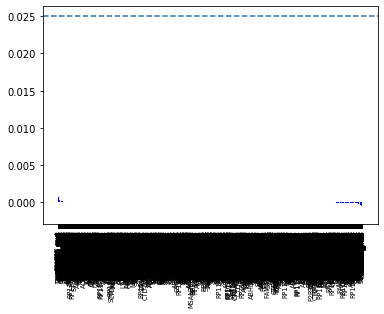

In [19]:
plt.xticks(rotation=90,fontsize=6.5)
plt.bar(perm_imp_rfpimp.index.values,perm_imp_rfpimp.Importance,color="blue")
plt.axhline(0.025,linestyle="dashed",color="red")
plt.savefig('RF_importances_python_Mutations.png',dpi=300)



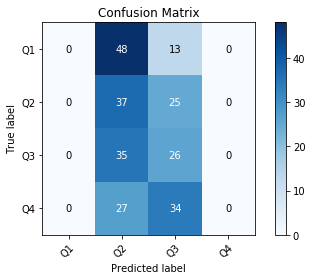

In [27]:
cm=sklearn.metrics.confusion_matrix(tobepredicted,converted_predicted)
classes = unique_labels(tobepredicted, converted_predicted)
classes=['Q1','Q2','Q3','Q4']

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.grid(False)
ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes,title="Confusion Matrix",ylabel='True label',xlabel='Predicted label')
ax.set_ylim(len(cm)-0.5, -0.5)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

plt.savefig('RF_ConfusionMatrix_python_Mutations.png',dpi=300)

In [28]:
binary_y= label_binarize(tobepredicted,classes=[1,2,3,4])
n_classes = binary_y.shape[1]
y_score=label_binarize(converted_predicted,classes=[1,2,3,4])

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binary_y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2

In [30]:
roc_auc

{0: 0.5, 1: 0.4978406486867618, 2: 0.5174625801853172, 3: 0.5}

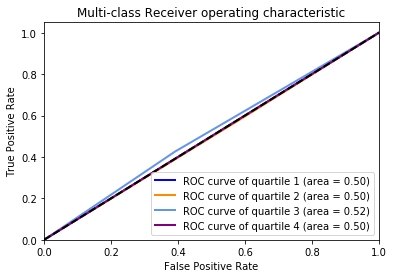

In [34]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= n_classes


# Plot all ROC curves
plt.figure()

colors = cycle(['blue', 'darkorange', 'cornflowerblue','purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of quartile {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('RF_ROC_python_Mutations.png',dpi=300)